In [4]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, fftfreq
from scipy.io.wavfile import read
from scipy.signal import butter, hilbert, lfilter

In [5]:
def butter_bp_filter(signal: np.ndarray, f_low: float, f_high: float, f_sample: float, order: int) -> np.ndarray:
    """Applies the specified butterworth bandpass filter to some signal.

    Parameters
    ----------
    signal
        The signal to be filtered.
    f_low
        Lower cutoff frequency.
    f_high
        Upper cutoff frequency.
    f_sample
        Sample frequency.
    order
        Filter order.

    Returns
    -------
    np.ndarray
        The filtered signal.

    """
    f_nyquist = f_sample / 2
    omega_low = f_low / f_nyquist
    omega_high = f_high / f_nyquist
    numerator, denominator = butter(order, [omega_low, omega_high], btype="band")
    filtered = lfilter(numerator, denominator, signal)
    return filtered

/var/folders/32/cf11384x3ts_ps6r00g9ytcc0000gn/T/ipykernel_50557/3715089603.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  f_sample, audio = read("example.wav")


Text(0, 0.5, 'FFT(signal) [arbitrary unit]')

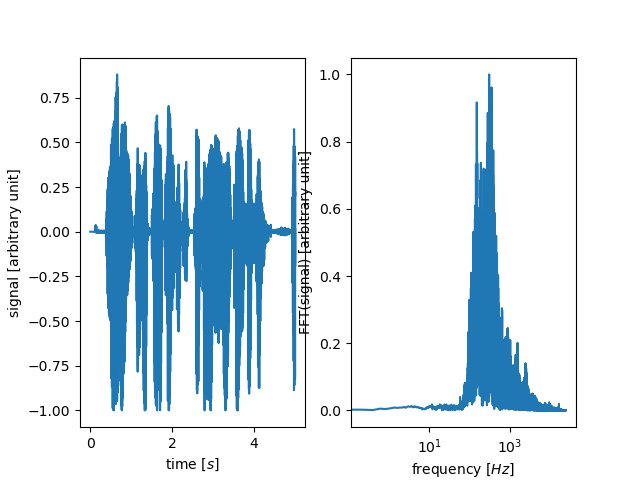

In [6]:
%matplotlib widget

# Load audio.
f_sample, audio = read("example.wav")

# Number of samples.
n = audio.size

# Calculate the time and frequency x axis values.
t = np.linspace(0, n / f_sample, n)
f = fftfreq(n, 1 / f_sample)

audio_fft = fft(audio)

# Plot signal and FFT.
fig, axs = plt.subplots(1, 2)

axs[0].plot(t, audio / max(abs(audio)))
axs[0].set_xlabel("time [$s$]")
axs[0].set_ylabel("signal [arbitrary unit]")

axs[1].semilogx(f[:n//2], abs(audio_fft[:n//2]) / max(abs(audio_fft[:n//2])))
axs[1].set_xlabel("frequency [$Hz$]")
axs[1].set_ylabel("FFT(signal) [arbitrary unit]")

Text(0, 0.5, 'FFT(signal) [arbitrary unit]')

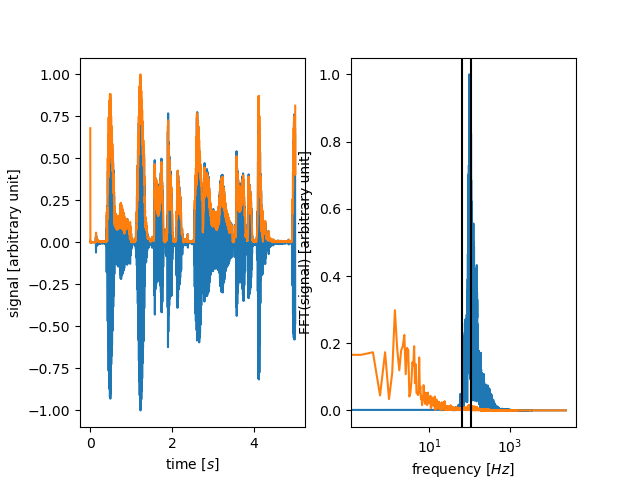

In [7]:
%matplotlib widget

f_low = 65
f_high = 105

# Apply a filter.
filtered = butter_bp_filter(audio, f_low=f_low, f_high=f_high, f_sample=f_sample, order=2)
filtered_fft = fft(filtered)

# Compute the signal envelope.
analytic = hilbert(filtered)
amplitude_env = np.abs(analytic)
amplitude_env_fft = fft(amplitude_env)

# Plot filtered signal and its envelope in time and frequency domain.
fig, axs = plt.subplots(1, 2)

axs[0].plot(t, filtered / max(abs(filtered)))
axs[0].plot(t, amplitude_env / max(amplitude_env))
axs[0].set_xlabel("time [$s$]")
axs[0].set_ylabel("signal [arbitrary unit]")

axs[1].semilogx(f[:n//2], abs(filtered_fft[:n//2]) / max(abs(filtered_fft[:n//2])))
axs[1].semilogx(f[:n//2], abs(amplitude_env_fft[:n//2]) / max(abs(amplitude_env_fft[:n//2])))
axs[1].axvline(f_low, c="k")
axs[1].axvline(f_high, c="k")
axs[1].set_xlabel("frequency [$Hz$]")
axs[1].set_ylabel("FFT(signal) [arbitrary unit]")